In [1]:
from astropy.io import ascii
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('afterglow_par.xlsx')
df['GRB Name'] = df['GRB Name'].str.replace(" ","")
df = df.drop(columns={'T90', 'z'})

In [3]:
def parser(lst):
    '''
    Takes in a list of strings, and for each string in list outputs a string of the digits until the first non digit, and 
    makes a list of the cleaned up strings
    '''
    lst_clean = []
    for stuff in lst:
        number = ''
        for alnum in str(stuff):
            if alnum.isdigit() or alnum == '.' or alnum == '-' or alnum in "GRB":
                number += alnum
            else:
                 break
        lst_clean.append(number)
    return pd.Series(lst_clean)  

In [4]:
df = df.apply(parser)
df['S(15–150 keV)a'] = df['S(15–150 keV)a'].str.strip()
df['α1'] = df['α1'].str.strip()
df['α2'] = df['α2'].str.strip()
df['log E_iso/10^53'] = df['log E_iso/10^53'].str.strip()
df["log E'_iso/10^53"] = df["log E'_iso/10^53"].str.strip()
df['log(Ta/103)b'] = df['log(Ta/103)b'].str.strip()
df['log (L_x/10^47 )'] = df['log (L_x/10^47 )'].str.strip()

In [5]:
df = df.astype({'S(15–150 keV)a':"float64", 'α1':'float64', 'α2':"float64", "log E_iso/10^53":"float64", 
               'log(Ta/103)b':"float64", 'log (L_x/10^47 )':"float64"})

In [8]:
swift_grbs = pd.read_csv('swift_data.csv', sep='\t')

In [10]:
merged_df = pd.merge(swift_grbs, df)

LGRBs = merged_df.loc[merged_df['T90']>2]
SGRBs = merged_df.loc[merged_df['T90']<2]

LGRBs_lowz = LGRBs.loc[LGRBs['z']<1]
LGRBs_highz  = LGRBs.loc[LGRBs['z']>1]
SGRBs_lowz = SGRBs.loc[SGRBs['z']<1]
SGRBs_highz  = SGRBs.loc[SGRBs['z']>1]

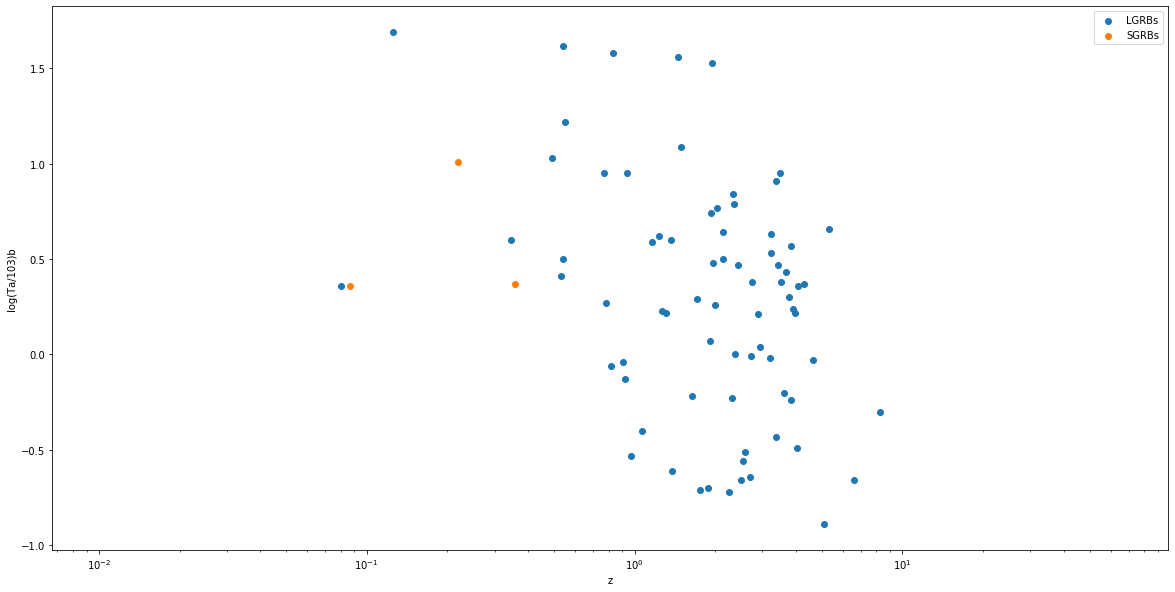

In [16]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')

plt.scatter(LGRBs['z'], LGRBs['log(Ta/103)b'])
plt.scatter(SGRBs['z'], SGRBs['log(Ta/103)b'])

plt.xlabel('z')
plt.ylabel('log(Ta/103)b')
plt.legend(['LGRBs','SGRBs'])
plt.show()

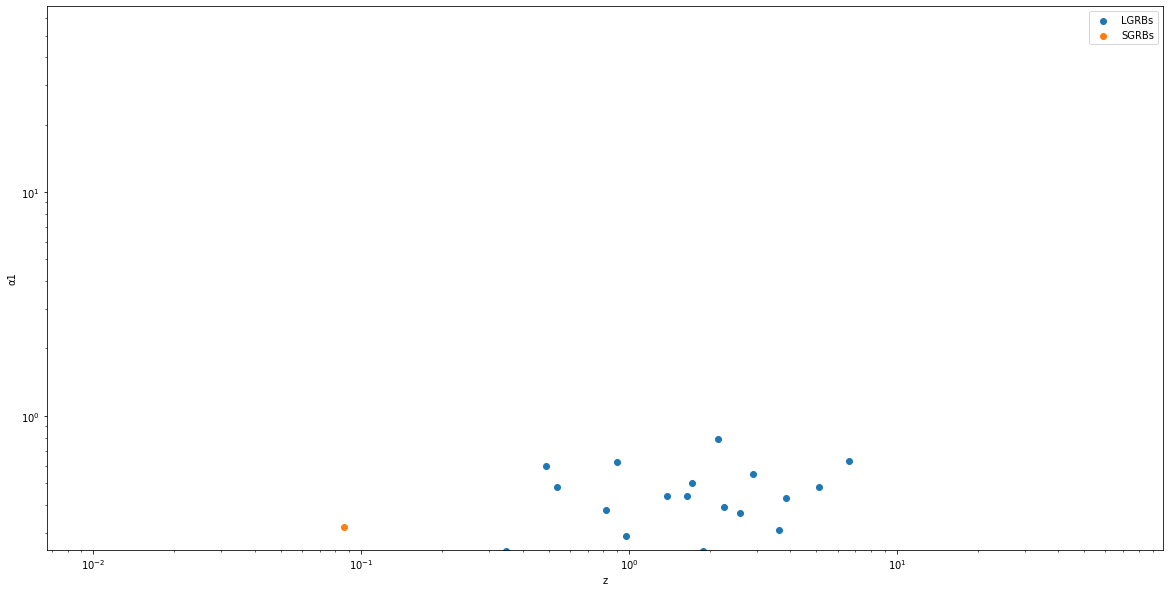

In [19]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(LGRBs['z'], LGRBs['α1'])
plt.scatter(SGRBs['z'], SGRBs['α1'])

plt.xlabel('z')
plt.ylabel('α1')
plt.legend(['LGRBs','SGRBs'])
plt.show()

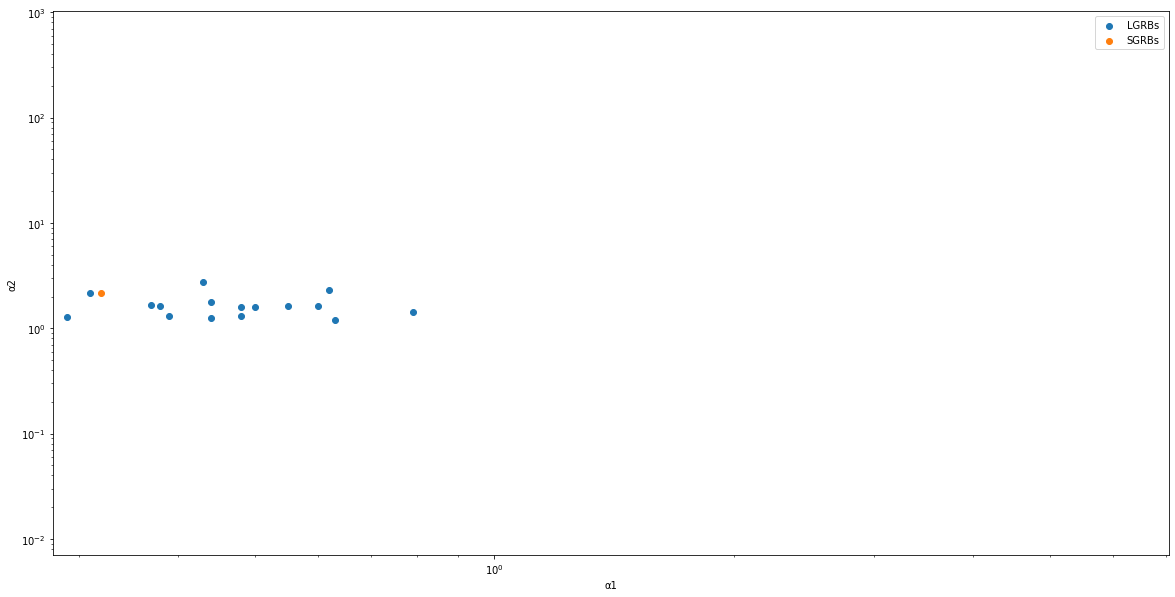

In [22]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(LGRBs['α1'], LGRBs['α2'])
plt.scatter(SGRBs['α1'], SGRBs['α2'])

plt.xlabel('α1')
plt.ylabel('α2')
plt.legend(['LGRBs','SGRBs'])
plt.show()

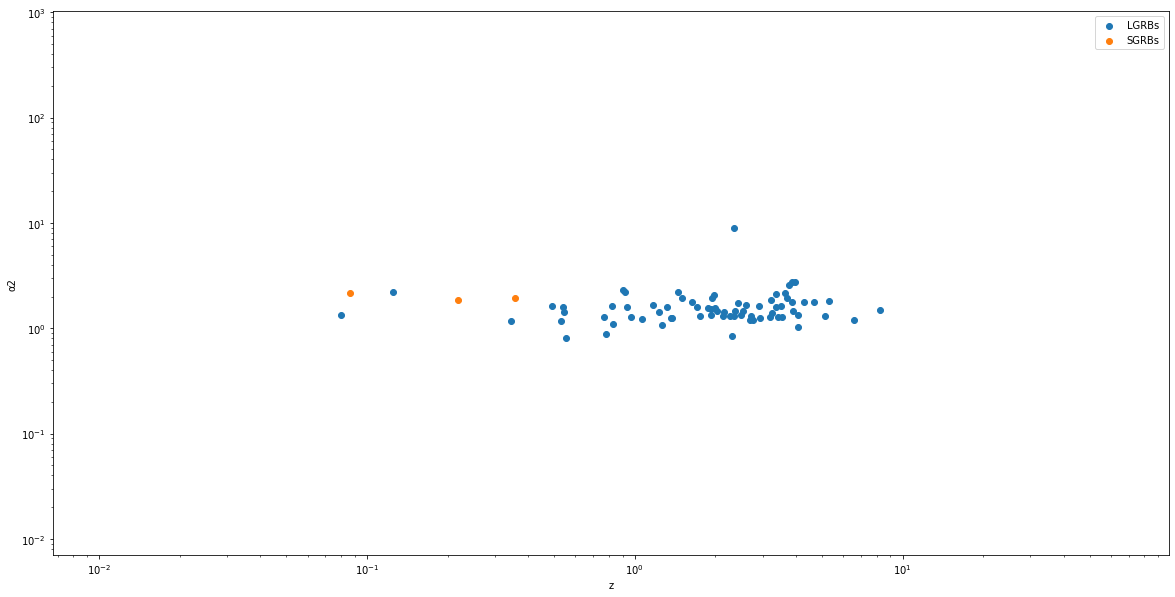

In [20]:
plt.figure(figsize=(20,10)) #sets figure size
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(LGRBs['z'], LGRBs['α2'])
plt.scatter(SGRBs['z'], SGRBs['α2'])

plt.xlabel('z')
plt.ylabel('α2')
plt.legend(['LGRBs','SGRBs'])
plt.show()